# PROJECT SPRINT 12 - MÉTODOS NUMÉRICOS

## 1 Introducción

### 1.1 Descripción del Proyecto

Rusty Bargain es un servicio de venta de coches de segunda mano que está desarrollando una app para atraer a nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial, especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.

A Rusty Bargain le interesa:

- la calidad de la predicción
- la velocidad de la predicción
- el tiempo requerido para el entrenamiento

### 1.2 Descripción de los Datos

El dataset está almacenado en el archivo `car_data.csv`.

**Características**
- `DateCrawled` — fecha en la que se descargó el perfil de la base de datos
- `VehicleType` — tipo de carrocería del vehículo
- `RegistrationYear` — año de matriculación del vehículo
- `Gearbox` — tipo de caja de cambios
- `Power` — potencia (CV)
- `Model` — modelo del vehículo
- `Mileage` — kilometraje (medido en km de acuerdo con las especificidades regionales del conjunto de datos)
- `RegistrationMonth` — mes de matriculación del vehículo
- `FuelType` — tipo de combustible
- `Brand` — marca del vehículo
- `NotRepaired` — vehículo con o sin reparación
- `DateCreated` — fecha de creación del perfil
- `NumberOfPictures` — número de fotos del vehículo
- `PostalCode` — código postal del propietario del perfil (usuario)
- `LastSeen` — fecha de la última vez que el usuario estuvo activo

**Objetivo**
- `Price`: Precio (en Euros).

## 2 Análisis de Datos

### 2.1 Importar las Librerías

In [190]:
# Importar todas las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint as sp_randInt
from scipy.stats import uniform as sp_randFloat
from sklearn.pipeline import Pipeline


from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


### 2.2 Cargar y Leer los Datos

In [191]:
# Cargar los datos
try:
    df = pd.read_csv('car_data.csv')
except:
    df = pd.read_csv('car_data.csv')

In [192]:
# Crear una función para leer los datos
# Obtener las características de head(), shape, info(), describe(), duplicated(), and isna().sum() de los datos
def data_info(df):
    print('Data Head')
    display(df.head())
    print('='*100)
    print()
    
    print('Column Names')
    display(df.columns)
    
    print('Data Shape')
    display(df.shape)
    print('='*100)
    print()
    
    print('Data Info')
    display(df.info())
    print('='*100)
    print()
    
    print('Data Describe')
    display(df.describe())
    print('='*100)
    print()
    
    print('Data Duplicated')
    display(df.duplicated().sum())
    print('='*100)
    print()
    
    print('Missing Values')
    display(df.isna().sum())
    print('*'*100)

In [193]:
# Aplicar la función y verificar el contenido y la calidad de los datos
data_info(df)

Data Head


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17



Column Names


Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Mileage', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

Data Shape


(354369, 16)


Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(

None


Data Describe


,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000



Data Duplicated


262


Missing Values


DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

****************************************************************************************************


In [194]:
# Verificando el valor único en la columna categórica 
categorical_features = [
    'VehicleType',
    'Gearbox',
    'Model',
    'FuelType',
    'Brand',
    'NotRepaired',
]

for feature in categorical_features:
    print(f'features {feature} {len(df[feature].value_counts())}')

features VehicleType 8
features Gearbox 2
features Model 250
features FuelType 7
features Brand 40
features NotRepaired 2


In [195]:
# Comprobar algunos datos en las dos columnas que tienen mas valores únicos. 
print('Model')
display(df['Model'].unique())
print('='*50)
print('Brand')
display(df['Brand'].unique())

Model


array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

Brand


array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

**Hallazgos:**

- El conjunto de datos contiene 16 columnas y 354,369 filas de datos.
- Las primeras 5 líneas de datos muestran algunos valores faltantes.
- No hay errores en los nombres de las columnas, y el formato de escritura es consistente.
- El conjunto de datos consume 43.4 MB de memoria, lo que potencialmente podría reducirse para mejorar la eficiencia del proceso de aprendizaje.
- Los tipos de datos en las columnas que contienen fechas, como `DateCrawled`, `DateCreated` y `LastSeen`, no siempre coinciden con el contenido de los datos. Estas columnas no son relevantes para el aprendizaje automático y deben eliminarse.
- La columna `Price` exhibe una diferencia significativa entre la media y la mediana, lo que sugiere la presencia de valores atípicos que deben ser abordados.
- Algunos campos tienen valores tan bajos como 0, incluyendo `Price`, `Power` y `RegistrationMonth`. Las razones detrás de estos valores de 0 necesitan ser investigadas y resueltas.
- El campo `RegistrationYear` tiene un valor máximo de 9999, lo que indica un error obvio de entrada que necesita corrección.
- El campo `NumberOfPictures` contiene solo el valor 0, lo que lo hace irrelevante y puede ser eliminado.
- Los campos categóricos `Model` y `Brand` contienen un gran número de valores únicos, lo que resultaría en un gran número de columnas después de la codificación one-hot (OHE). Se deben considerar enfoques alternativos para manejar estos datos categóricos sin OHE.
- Hay 262 filas de datos duplicados, que pueden ser eliminadas sin problema.
- Los valores faltantes son prevalentes en diferentes columnas y necesitan ser abordados.
- Más del 10% de las filas tienen valores faltantes en la columna `VehicleType`, y más del 20% en la columna `NotRepaired`. Estos valores faltantes requieren métodos alternativos de manejo.

### 2.3 Pre-procesamiento de los Datos

Vamos a comprobar y corregir los problemas encontrados en el dataset.

#### 2.3.1 Eliminar Características Innecesarias

Consideramos que algunas de las columnas o características son innecesarias para el proceso de aprendizaje automático, a saber, `DateCrawled`, `RegistrationMonth`, `DateCreated`, `NumberOfPictures`, `LastSeen` y `PostalCode`. Estas características pueden no tener una fuerte correlación con la característica objetivo (`Price`) o ya tienen sustituciones adecuadas, por lo tanto, pueden distraer potencialmente el proceso de aprendizaje automático.

In [196]:
# Eliminar columnas innecesarias y comprobar el resultado
df = df.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'LastSeen', 'PostalCode'], axis=1)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


In [197]:
# Verificar valores únicos en Registration Month
print(sorted(df['RegistrationMonth'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [198]:
# Eliminar valores de Registration Month iguales a cero
df = df[df['RegistrationMonth'] != 0]

In [199]:
# Comprobar y contar que los valores de Registration Month sean congruentes
df.groupby(by='RegistrationMonth')['RegistrationMonth'].count()

RegistrationMonth
1     23219
2     21267
3     34373
4     29270
5     29153
6     31508
7     27213
8     22627
9     23813
10    26099
11    24186
12    24289
Name: RegistrationMonth, dtype: int64

In [200]:
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes


#### 2.3.2 Comprobar la Distribución de 'Price' 

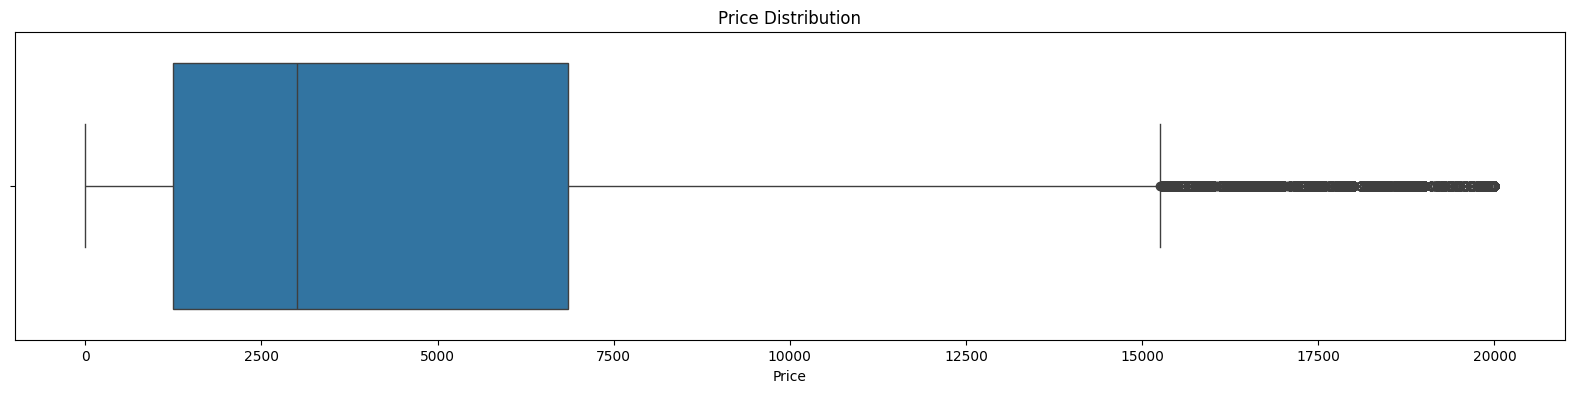

In [201]:
plt.figure(figsize=(20, 4))

plt.title('Price Distribution')
sns.boxplot(x = df['Price'])

plt.show()

Todos los valores atípicos están por encima del bigote superior. La cantidad de datos que cae en esta categoría puede determinarse calculando el número de puntos de datos que se encuentran por encima del bigote superior en el diagrama de caja.

In [202]:
# Calcular los valores atípicos del bigote superior
upper_whisker = df['Price'].quantile(0.75) + (1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))
upper_whisker

15250.0

In [203]:
# Calcular el porcentaje de valores atípicos
print(round(len(df[df['Price'] > 14425]) / len(df['Price']) * 100, 2), '%')

5.86 %


Los datos atípicos representan solo el 5.36%, lo suficientemente pequeño como para que simplemente los eliminemos.

In [204]:
# Actualizar los datos sin los valores atípicos en la columna 'Price'
df = df[df['Price'] < 14425].reset_index(drop=True)
df.shape

(298424, 11)

#### 2.3.3 Verificando la Distribución de la Característica 'RegistrationYear'

In [205]:
# Comprobar por valores únicos en 'RegistrationYear'
print(sorted(df['RegistrationYear'].unique()))

[1000, 1234, 1400, 1500, 1600, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2200, 2800, 2900, 3000, 3500, 4800, 5000, 6500, 7000, 7100, 8200, 8455, 9000, 9999]


In [206]:
# Comprobar la distribución
df.groupby(by='RegistrationYear')['RegistrationYear'].count()

RegistrationYear
1000    8
1234    1
1400    1
1500    2
1600    1
       ..
7100    1
8200    1
8455    1
9000    1
9999    3
Name: RegistrationYear, Length: 115, dtype: int64

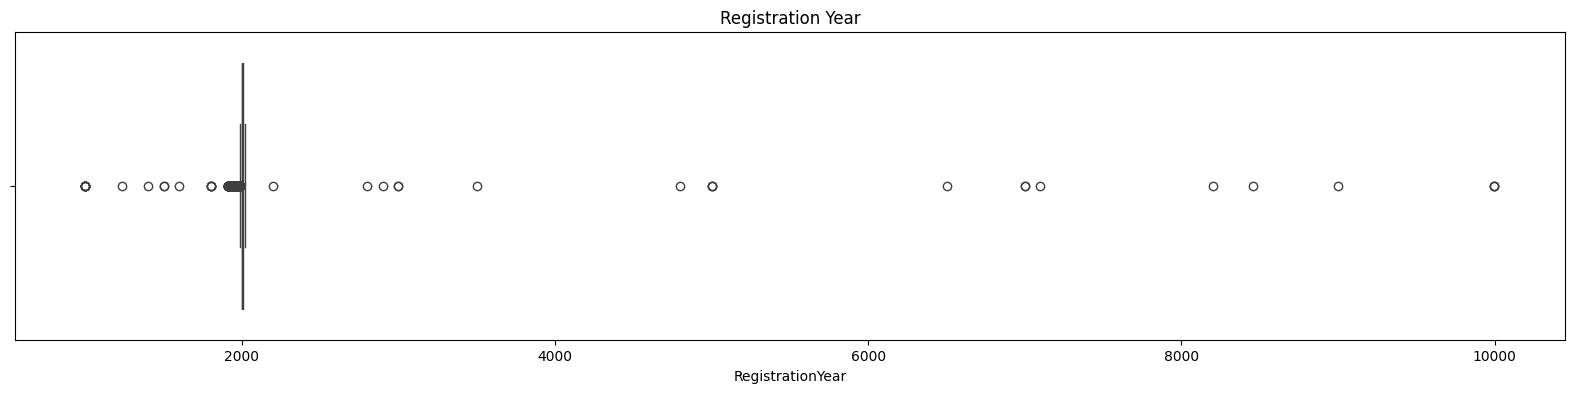

In [207]:
# Verificar la visualización de la distribución de los datos
plt.figure(figsize=(20, 4))

plt.title('Registration Year')
sns.boxplot(x = df['RegistrationYear'])

plt.show()

Esta característica contiene valores demasiado aleatorios y sin sentido. El diagrama de caja muestra que los datos están concentrados en el rango de años alrededor de 2000. Para estar seguros, solo consideraremos datos dentro del rango de años de 1900 a 2022.

In [208]:
# Seleccionar los datos de 'RegistrationYear' desde 1900 hasta 2022
df =df[(1900 <= df['RegistrationYear']) & (df['RegistrationYear'] <= 2022)].reset_index(drop=True)
df.shape

(298387, 11)

#### 2.3.4 Manejo de Valores Cero

**Columna 'Price'**

In [209]:
# Verificar valores en la columna 'Price'
print(sorted(df['Price'].unique()))

[0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 24, 25, 26, 27, 29, 30, 33, 35, 38, 39, 40, 45, 47, 49, 50, 55, 59, 60, 65, 66, 70, 75, 79, 80, 85, 89, 90, 95, 98, 99, 100, 101, 106, 108, 110, 111, 112, 115, 117, 119, 120, 122, 123, 125, 126, 127, 128, 129, 130, 132, 133, 135, 139, 140, 142, 145, 149, 150, 155, 156, 157, 158, 159, 160, 162, 165, 166, 169, 170, 173, 175, 179, 180, 181, 185, 188, 189, 190, 192, 193, 195, 196, 198, 199, 200, 202, 205, 209, 210, 211, 215, 217, 219, 220, 222, 224, 225, 229, 230, 233, 235, 236, 238, 240, 243, 245, 248, 249, 250, 251, 252, 253, 255, 259, 260, 261, 263, 265, 266, 269, 270, 272, 273, 274, 275, 277, 279, 280, 284, 285, 289, 290, 295, 298, 299, 300, 301, 305, 308, 309, 310, 315, 316, 319, 320, 321, 323, 325, 329, 330, 331, 332, 333, 335, 338, 339, 340, 341, 344, 345, 348, 349, 350, 355, 356, 359, 360, 365, 366, 368, 369, 370, 373, 375, 377, 379, 380, 384, 385, 388, 389, 390, 393, 395, 397, 398, 399, 400, 408, 410, 414, 415, 418, 420

In [210]:
# Comprobar la distribución en los 20 valores más bajos
df.groupby(by='Price')['Price'].count().head(20)

Price
0     6292
1      675
2        7
3        6
5       13
7        1
9        5
10      36
11       2
12       3
13       4
15       2
16       1
17       2
18       1
19       2
20      13
24       1
25       8
26       1
Name: Price, dtype: int64

El valor 0 en 'Price' podría indicar un vehículo gratuito o un error en la entrada de datos. Además del valor 0, existen otros valores pequeños que también son igualmente absurdos para el precio del vehículo.

Eliminar el valor 0 debería implicar eliminar también estos valores inusualmente pequeños. En este caso, se ha decidido eliminar únicamente las filas de datos donde los valores de 'Price' en el DataFrame 'df' sean inferiores a 100.

In [211]:
# Eliminar los datos de 'Price' que sean menores a 100
df = df[df['Price'] > 99].reset_index(drop=True)
df.shape

(290807, 11)

Los datos han sido eliminados con éxito. Sin embargo, todavía tenemos un número considerable de filas de datos restantes.

**Columna 'Power'**

In [212]:
# Comprobar los valores en la columna 'Power'
print(sorted(df['Power'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [213]:
# Verificar la distribución en los 20 valores más bajos
df.groupby(by='Power')['Power'].count().head(20)

Power
0     22725
1        19
2         6
3         8
4        28
5        88
6        11
7        10
8         7
9         3
10       12
11       27
12       12
13        6
14       17
15        9
16        5
17        7
18       41
19        9
Name: Power, dtype: int64

In [214]:
# Verificar más a fondo los precios de los autos con 'Power' igual a 0
df.query('Power == 0')['Price'].head(10)

24      245
27     1500
42      550
54      800
72     2400
77     4290
88      350
102    8000
105    3390
117     150
Name: Price, dtype: int64

La situación es similar en la columna 'Price'. Los autos con 0 caballos de fuerza ciertamente no son comunes, pero aquellos con caballos de fuerza bajos también son muy raros. La mayoría de los modelos de autos recientes generalmente no tienen valores de caballos de fuerza por debajo de 50.

Sin embargo, es posible que en el conjunto de datos estén incluidos autos más antiguos con caballos de fuerza más bajos. Por lo tanto, no eliminaremos simplemente las filas de datos con valores bajos de caballos de fuerza.

Por otro lado, los datos en la columna 'Power' con un valor de 0 no son bastante significativos, ahora intentaremos eliminar todos los valores donde power sea igual a cero.

In [215]:
# Verificar la correlación entre los datos
# df.corr()

In [216]:
# Eliminar los valores donde power sea igual a cero
df = df[df['Power'] != 0]
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
1,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
2,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
3,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes
4,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no


In [217]:
# Crear una función para agrupar por precios
def price_group(price):
    if price <= 500:
        return 'cheap'
    elif 500 < price <= 2000:
        return 'medium'
    elif 2000 < price <= 10000:
        return 'expensive'
    else:
        return 'very_expensive'

In [218]:
# Comprobar la función
print(price_group(150))
print(price_group(1000))
print(price_group(5000))
print(price_group(12000))

cheap
medium
expensive
very_expensive


In [219]:
# Crear una nueva columna basada en la función 
df['PriceGroup'] = df['Price'].apply(price_group)

In [220]:
# Verificar los resultados del dataset
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PriceGroup
0,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,expensive
1,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,medium
2,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,expensive
3,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,medium
4,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,expensive


La función funciona perfectamente; los valores de 0 han sido reemplazados con los valores de mediana apropiados.

#### 2.3.5 Eliminar Duplicados

Solo hay 262 filas duplicadas, las cuales se pueden eliminar de forma segura.

In [221]:
# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [222]:
# Revisando nuevamente los datos.
df.shape

(246644, 12)

#### 2.3.6 Manejo de Valores Ausentes

Based on the previous checks, there are a considerable number of missing values in this dataset.

In [223]:
# Verificar el total de valores ausentes
df.isna().sum()

Price                    0
VehicleType          14722
RegistrationYear         0
Gearbox               3915
Power                    0
Model                 9048
Mileage                  0
RegistrationMonth        0
FuelType             13753
Brand                    0
NotRepaired          33988
PriceGroup               0
dtype: int64

In [224]:
# Verificando las características de las columnas con valores faltantes
df.head(3)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PriceGroup
0,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,expensive
1,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,medium
2,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,expensive


In [225]:
# Verificando los tipos de datos
df.dtypes

Price                 int64
VehicleType          object
RegistrationYear      int64
Gearbox              object
Power                 int64
Model                object
Mileage               int64
RegistrationMonth     int64
FuelType             object
Brand                object
NotRepaired          object
PriceGroup           object
dtype: object

Se puede observar que todos los datos faltantes están en columnas no numéricas o datos categóricos. Vamos a llenar todos los valores faltantes con 'desconocido'.

In [226]:
# Rellenar los valores ausentes
df.fillna(value='unknown', inplace=True)
df.head(3)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PriceGroup
0,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,expensive
1,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,medium
2,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,expensive


In [227]:
# Comrpbar el resultado
df.isna().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
PriceGroup           0
dtype: int64

Todos los valores ausentes han sido rellenados.

#### 2.3.7 Reducir el Tamaño del Conjunto de Datos

El conjunto de datos que obtuvimos es relativamente pequeño, pero veamos si podemos reducir su tamaño cambiando los tipos de datos.

In [228]:
def convert_numeric_to_smaller_type(df):
    """
    Changing the numeric data type in the dataset to take a smaller data type (according to the range of values in the column).
    :param df: the dataset to change the data type of the numeric column  
    :return: dataset with a smaller numeric data type
    """
    # Obtener una lista de columnas numéricas
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # Calcular la memoria inicial
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe       = {:.2f} MB'.format(start_mem))
    
    # Cambiar el tipo de datos numérico en cada columna
    for col in numeric_cols:
        col_min = df[col].min()
        col_max = df[col].max()
        if col_min >= 0:
            if col_max < 256:
                df[col] = df[col].astype(np.uint8)
            elif col_max < 65536:
                df[col] = df[col].astype(np.uint16)
            elif col_max < 4294967296:
                df[col] = df[col].astype(np.uint32)
            else:
                df[col] = df[col].astype(np.uint64)
        else:
            if col_min >= np.iinfo(np.int8).min and col_max <= np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif col_min >= np.iinfo(np.int16).min and col_max <= np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif col_min >= np.iinfo(np.int32).min and col_max <= np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.int64)
                
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization = {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [229]:
# Implementar la función
df = convert_numeric_to_smaller_type(df)

Memory usage of dataframe       = 22.58 MB
Memory usage after optimization = 15.76 MB
Decreased by 30.2%


In [230]:
# Comprobar los resultados
df.dtypes

Price                uint16
VehicleType          object
RegistrationYear     uint16
Gearbox              object
Power                uint16
Model                object
Mileage              uint32
RegistrationMonth     uint8
FuelType             object
Brand                object
NotRepaired          object
PriceGroup           object
dtype: object

Se ha completado todo el preprocesamiento de datos.

### 2.4 Preparando los Datasets

Vamos a entrenar varios modelos y comparar los resultados. Mientras que algunos modelos pueden manejar características categóricas, otros no pueden. Por lo tanto, necesitamos preparar dos conjuntos de datos separados para las necesidades de entrenamiento de estos modelos.

- 'df' será el conjunto de datos principal que contiene las características categóricas sin cambios. Este conjunto de datos se utilizará para los modelos capaces de manejar características categóricas.
- 'df_new' se utilizará para los modelos que no pueden manejar características categóricas. Por lo tanto, en este conjunto de datos convertiremos sus características categóricas en características numéricas mediante codificación.

#### 2.4.1 Dataset 'df_new'

Para preparar este nuevo conjunto de datos, seguiremos varios pasos:

- Eliminaremos las características 'Model' y 'Brand' ya que contienen demasiados valores únicos.
- Eliminaremos la característica 'PriceGroup' ya que solo se usó para ayudar a completar valores faltantes.
- Crearemos un nuevo conjunto de datos 'df_new' copiando el conjunto de datos 'df' y eliminando las características mencionadas.
- Dado que consideramos que las características categóricas en nuestro conjunto de datos son nominales, no podemos usar OrdinalEncoder. En su lugar, utilizaremos la función 'get_dummies' de Pandas para realizar codificación one-hot (OHE).

In [231]:
# Preparar los dataset alernativos
df_new = df.copy().drop(['Model', 'Brand', 'PriceGroup'], axis=1)
df_new.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Mileage,RegistrationMonth,FuelType,NotRepaired
0,9800,suv,2004,auto,163,125000,8,gasoline,unknown
1,1500,small,2001,manual,75,150000,6,petrol,no
2,3600,small,2008,manual,69,90000,7,gasoline,no
3,650,sedan,1995,manual,102,150000,10,petrol,yes
4,2200,convertible,2004,manual,109,150000,8,petrol,no


In [232]:
# Realizar la codificación
df_new = pd.get_dummies(df_new, drop_first=True)

In [233]:
# Comprobar el nuevo dataset
df_new.shape

(246644, 24)

In [234]:
# Verificar las columnas del nuevo dataset
df_new.columns

Index(['Price', 'RegistrationYear', 'Power', 'Mileage', 'RegistrationMonth',
       'VehicleType_convertible', 'VehicleType_coupe', 'VehicleType_other',
       'VehicleType_sedan', 'VehicleType_small', 'VehicleType_suv',
       'VehicleType_unknown', 'VehicleType_wagon', 'Gearbox_manual',
       'Gearbox_unknown', 'FuelType_electric', 'FuelType_gasoline',
       'FuelType_hybrid', 'FuelType_lpg', 'FuelType_other', 'FuelType_petrol',
       'FuelType_unknown', 'NotRepaired_unknown', 'NotRepaired_yes'],
      dtype='object')

#### 2.4.2 Dividir el Conjunto de Datos en Características y Objetivos 

In [235]:
# Eliminar columna PriceGroup
df = df.drop(['PriceGroup'], axis=1)

In [236]:
df.head(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown
1,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
2,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
3,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes
4,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no
5,2000,sedan,2004,manual,105,3_reihe,150000,12,petrol,mazda,no
6,2799,wagon,2005,manual,140,passat,150000,12,gasoline,volkswagen,yes
7,999,wagon,1995,manual,115,passat,150000,11,petrol,volkswagen,unknown
8,2500,wagon,2004,manual,131,passat,150000,2,unknown,volkswagen,no
9,1750,small,2004,auto,75,twingo,150000,2,petrol,renault,no


In [237]:
# Dataset principal
features = df.drop('Price', axis=1)
target = df['Price']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2,
                                                                 random_state=2023)

In [238]:
# Comprobar el tamaño del dataset
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(197315, 10)
(49329, 10)
(197315,)
(49329,)


In [239]:
# El conjunto de datos codificado
features_new = df_new.drop('Price', axis=1)
target_new = df_new['Price']
features_train_new, features_test_new, target_train_new, target_test_new = train_test_split(features_new, target_new, test_size=0.2,
                                                                 random_state=2023)

In [240]:
# Comprobar el tamaño del dataset
print(features_train_new.shape)
print(features_test_new.shape)
print(target_train_new.shape)
print(target_test_new.shape)

(197315, 23)
(49329, 23)
(197315,)
(49329,)


#### 2.4.3 Escalado de Características (Scaling)

Para asegurarnos de que las características numéricas en el conjunto de datos sean tratadas de manera equitativa y no estén influenciadas por rangos variables de valores, realizaremos un escalado de características en el conjunto de datos existente. Esto ayudará a evitar que el modelo interprete características con un rango alto de valores como más importantes que otras.

In [241]:
# Realizando el escalado de características
numeric = features_train.select_dtypes(include=['uint16', 'uint32']).columns
scaler = StandardScaler()
features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_train.head()

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
182043,sedan,-1.051633,auto,-0.024528,vectra,0.564781,1,petrol,opel,no
39939,small,-0.751366,manual,-0.235325,other,0.564781,10,petrol,rover,no
59158,wagon,0.599832,manual,0.098866,golf,-0.869059,10,gasoline,volkswagen,no
101925,bus,0.149432,manual,-0.173628,meriva,-0.152139,2,petrol,opel,no
94345,wagon,0.299565,manual,0.217118,a4,0.564781,7,gasoline,audi,no


In [242]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
138671,small,-0.451100,manual,-0.158204,corsa,0.564781,10,petrol,opel,no
38505,small,-1.051633,manual,-0.235325,golf,0.564781,3,unknown,volkswagen,unknown
207333,coupe,0.449699,manual,0.114290,c_klasse,0.564781,6,petrol,mercedes_benz,unknown
21110,sedan,-0.150834,manual,0.114290,3er,-0.152139,12,petrol,bmw,no
29769,bus,-0.601233,manual,-0.404991,move,0.564781,3,petrol,daihatsu,unknown


In [243]:
features_train_new[numeric] = scaler.transform(features_train_new[numeric])
features_train_new.head()

,RegistrationYear,Power,Mileage,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Gearbox_unknown,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,FuelType_unknown,NotRepaired_unknown,NotRepaired_yes
182043,-1.051633,-0.024528,0.564781,1,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
39939,-0.751366,-0.235325,0.564781,10,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
59158,0.599832,0.098866,-0.869059,10,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
101925,0.149432,-0.173628,-0.152139,2,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
94345,0.299565,0.217118,0.564781,7,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [244]:
features_test_new[numeric] = scaler.transform(features_test_new[numeric])
features_test_new.head()

,RegistrationYear,Power,Mileage,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Gearbox_unknown,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,FuelType_unknown,NotRepaired_unknown,NotRepaired_yes
138671,-0.451100,-0.158204,0.564781,10,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
38505,-1.051633,-0.235325,0.564781,3,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
207333,0.449699,0.114290,0.564781,6,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
21110,-0.150834,0.114290,-0.152139,12,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
29769,-0.601233,-0.404991,0.564781,3,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


## 3 Entrenamiento del Modelo

Los principales intereses de Rusty Bargain radican en la calidad de la predicción, la velocidad de predicción y el tiempo de entrenamiento del modelo. Por lo tanto, evaluaremos cuidadosamente el modelo en función de estos tres aspectos.

Para evaluar el rendimiento del modelo, utilizaremos la métrica de Error Cuadrático Medio (RMSE). Por lo tanto, definiremos una función para calcular esta métrica.

Como no tenemos un conjunto de datos de validación separado, utilizaremos la técnica de validación cruzada para la evaluación.

In [245]:
# Función para calcular RMSE
def rmse(y_true, y_pred):
    """
    Fungsi untuk menghitung nilai Root Mean Squared Error (RMSE).
    :param y_true: array dengan nilai sebenarnya
    :param y_pred: array dengan nilai prediksi
    :return: nilai RMSE
    """
        
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Haciendo de la métrica RMSE un evaluador para el modelo
rmse_scorer = make_scorer(rmse)

Se nos ha indicado utilizar el modelo de Regresión Lineal como el modelo base. Este modelo servirá como una verificación básica para otros modelos más sofisticados. Se espera que estos modelos avanzados superen al modelo de Regresión Lineal, resultando en mejores valores de RMSE.

### 3.1 Regresión Lineal (Base Model)

In [246]:
%%time

# Calcular las puntuaciones para los modelos de Regresión Lineal
LR = LinearRegression() 
LR_score = cross_val_score(LR, features_train_new, target_train_new, scoring=rmse_scorer, cv=5)
LR_score.mean()

CPU times: total: 391 ms
Wall time: 468 ms


2541.3952592352216

In [247]:
%%time

# Pruebas en un conjunto de datos de prueba
LR = LinearRegression().fit(features_train_new, target_train_new)
LR_pred = LR.predict(features_test_new)
LR_rmse = rmse(target_test_new, LR_pred)
LR_rmse

CPU times: total: 109 ms
Wall time: 108 ms


2530.6685642941547

Obtuvimos dos valores de RMSE como puntos de referencia, a saber, 2597.5 para entrenamiento y validación, y 2622.86 para pruebas. Además, los tiempos de entrenamiento y prueba también son relativamente cortos.

### 3.2 Árbol de Decisión

Después de obtener el valor de referencia de RMSE del modelo de Regresión Lineal, ahora probaremos varios otros modelos para encontrar uno que pueda proporcionar una mejor puntuación.

El primer modelo que probaremos es el Regresor de Árbol de Decisión. Estableceremos los hiperparámetros en este modelo, específicamente para la profundidad máxima del árbol ('max_depth').

In [248]:
%%time

# Entrenamiento sin ajustar los hiperparámetros
DT = DecisionTreeRegressor(random_state=2023)
scores = cross_val_score(DT, features_train_new, target_train_new, scoring=rmse_scorer, cv=5).mean()
scores

CPU times: total: 2.11 s
Wall time: 3.04 s


1985.4872454438985

In [249]:
%%time

# Entrenamiento con ajuste de hiperparámetros
# Crear una lista para almacenar la puntuación
depth_scores = []

# Realizar validación cruzada para cada nivel de profundidad del árbol de 1 a 15
for depth in range(1, 16):
    DTR = DecisionTreeRegressor(max_depth=depth, random_state=2023)
    scores = cross_val_score(DTR, features_train_new, target_train_new, scoring=rmse_scorer, cv=5)
    depth_scores.append(scores.mean())

# Verificar la mejor profundidad con la mejor puntuación
best_depth_score_index = np.argmin(depth_scores)
best_depth_score = best_depth_score_index + 1
best_score = depth_scores[best_depth_score_index]

print("Best n_estimators:", best_depth_score)
print("Best score:", best_score)

Best n_estimators: 12
Best score: 1682.533419308326
CPU times: total: 12.8 s
Wall time: 17.1 s


Obtuvimos la puntuación más baja en el nivel de profundidad del árbol 13, que es 1682.05. Este valor es mejor que el modelo base o el modelo de Regresor de Árbol de Decisión sin ajuste de hiperparámetros.

In [250]:
%%time

# Prueba en un conjunto de datos de prueba
DT = DecisionTreeRegressor(max_depth=13, random_state=2023).fit(features_train_new, target_train_new)
DT_pred = DT.predict(features_test_new)
DT_rmse = rmse(target_test_new, DT_pred)
DT_rmse

CPU times: total: 266 ms
Wall time: 426 ms


1666.1285824307954

Obtenemos una puntuación de 1663.68 con un tiempo de prueba corto.

### 3.3 Bosque Aleatorio

Ahora utilizaremos el modelo de Regresión de Bosque Aleatorio. Primero entrenaremos el modelo sin ajustar los hiperparámetros. Luego, en el siguiente entrenamiento, intentaremos ajustar el hiperparámetro para el número de árboles, manteniendo 'max_depth' configurado en la mejor opción del modelo anterior, que es 13.

In [251]:
%%time

# Entrenamiento sin ajustar los hiperparámetros
RF = RandomForestRegressor(random_state=2023)
RF_score = cross_val_score(RF, features_train_new, target_train_new, scoring=rmse_scorer, cv=5).mean()
RF_score

CPU times: total: 2min 37s
Wall time: 2min 57s


1595.7636210002072

Incluso sin ajuste de hiperparámetros, hemos obtenido una mejor puntuación que el modelo anterior. Sin embargo, el tiempo de entrenamiento es bastante largo, lo cual Rusty Bargain no apreció.

Ahora procedamos con el ajuste de hiperparámetros.

In [252]:
%%time

# Entrenamiento con ajuste de hiperparámetros
# Inicializar la variable para almacenar el mejor valor de RMSE
best_rmse = np.inf
best_n_estimators = None
estimator_scores = []

# Bucle para encontrar el mejor valor de 'n_estimators'
for n_estimators in range(10, 101, 20):
    # Iniciar el modelo de Bosque Aleatorio
    RFR = RandomForestRegressor(n_estimators=n_estimators, max_depth=13, random_state=2023)

    # Calcular la puntuación de validación cruzada con RMSE como métrica
    scores = cross_val_score(RFR, features_train_new, target_train_new, scoring=rmse_scorer, cv=5)
    estimator_scores.append(scores.mean())
    
    # Calcular el promedio de los mejores puntajes de RMSE y puntajes
    avg_rmse = np.mean(scores)
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_n_estimators = n_estimators
    
    # Mostrar los resultados de puntuación para cada valor de 'n_estimators'
    print("n_estimators:", n_estimators, "score:", scores.mean())

best_n_estimators_index = np.argmin(estimator_scores)
best_score = estimator_scores[best_n_estimators_index]

# Mostrar el valor de 'n_estimators' y la mejor puntuación obtenida
print('Best n_estimators:', best_n_estimators)
print("Best score:", best_score)

n_estimators: 10 score: 1590.5162071749414
n_estimators: 30 score: 1578.1314460151284
n_estimators: 50 score: 1576.132461834371
n_estimators: 70 score: 1574.7923708316291
n_estimators: 90 score: 1574.2450457150676
Best n_estimators: 90
Best score: 1574.2450457150676
CPU times: total: 3min 44s
Wall time: 4min 28s


Nuestra puntuación sigue mejorando significativamente con un número creciente de árboles o 'n_estimators'. Por lo tanto, sospechamos que la puntuación probablemente seguirá mejorando si aumentamos aún más el número de árboles. Para probar esta hipótesis, evaluaremos el rendimiento del modelo en un conjunto de datos de prueba para tres escenarios de 'n_estimators': 50, 100 y 500.

In [253]:
%%time

# Pruebas en el conjunto de datos de prueba
RFR = RandomForestRegressor(n_estimators=50, max_depth=13, random_state=2023).fit(features_train_new, target_train_new)
RFR_pred = RFR.predict(features_test_new)
RFR_rmse = rmse(target_test_new, RFR_pred)
RFR_rmse

CPU times: total: 10 s
Wall time: 14 s


1571.083055345509

In [254]:
%%time

# Pruebas en el conjunto de datos de prueba
RFR = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=2023).fit(features_train_new, target_train_new)
RFR_pred = RFR.predict(features_test_new)
RFR_rmse = rmse(target_test_new, RFR_pred)
RFR_rmse

CPU times: total: 19.2 s
Wall time: 28 s


1569.0928986914312

In [255]:
%%time

# Pruebas en el conjunto de datos de prueba
RFR = RandomForestRegressor(n_estimators=500, max_depth=13, random_state=2023).fit(features_train_new, target_train_new)
RFR_pred = RFR.predict(features_test_new)
RFR_rmse = rmse(target_test_new, RFR_pred)
RFR_rmse

CPU times: total: 1min 38s
Wall time: 2min 20s


1566.9758423612914

A medida que aumenta el número de árboles, el puntaje de error disminuye, pero el tiempo de prueba también aumenta significativamente, lo cual no le agrada a Rusty Bargain.

Observamos que la tasa de disminución en el puntaje de error se vuelve más modesta a medida que aumenta rápidamente el número de árboles. Considerando que el tiempo de prueba es uno de los parámetros que le preocupa a Rusty Bargain, parece que establecer el número de árboles en 50 es más ideal. Aunque tiene un puntaje de error ligeramente más alto en comparación con el modelo con 500 árboles, ya supera significativamente a los dos modelos anteriores.

### 3.4 XGBoost Regressor

Ahora es el momento de utilizar el modelo de Gradient Boosting. Antes de realizar el ajuste de hiperparámetros con técnicas de validación cruzada utilizando RandomizedSearchCV, probamos el modelo sin ningún ajuste de hiperparámetros.

In [256]:
%%time

# Entrenamiento sin ajuste de hiperparámetros
XGB = XGBRegressor()
XGB_scores = cross_val_score(XGB, features_train_new, target_train_new, scoring=rmse_scorer, cv=5).mean()
XGB_scores

CPU times: total: 4.62 s
Wall time: 1.77 s


1553.8070068359375

Logramos una puntuación superior en comparación con el modelo de Random Forest con 500 árboles.

Ahora, procedamos con el ajuste de hiperparámetros.

Para asegurarnos de que estamos utilizando la función de pérdida y buscando el puntaje más bajo, necesitamos agregar el parámetro 'greater_is_better=False' a la función 'make_scorer'. De esta manera, el mejor parámetro elegido no resultará en el puntaje más alto, sino en el más bajo.

Realizaremos varias variaciones de la prueba.

#### 3.4.1 Utilizar Números de Parámetros Definidos

In [257]:
%%time

# Entrenamiento con ajuste de hiperparámetros
# Definir un modelo de Regresor XGBoost
xgb_model = XGBRegressor()

# Definir el espacio de hiperparámetros
param_distributions = {
    'max_depth': [5, 10],
    'n_estimators': [25, 50],
    'subsample': [0.5, 1]
}

# Crear un evaluador utilizando la función de RMSE
scorer = make_scorer(rmse, greater_is_better=False)

# Definir un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_distributions, 
    scoring=scorer, n_iter=10, cv=5, n_jobs=-1
)

# Ajustar el modelo con los datos
random_search.fit(features_train_new, target_train_new)

# Imprimir los mejores parámetros y el valor de RMSE
print("Best Estimator:", random_search.best_estimator_)
print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -1 * random_search.best_score_)

Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Best Parameters: {'subsample': 1, 'n_estimators': 50, 'max_depth': 10}
Best RMSE: 1537.531689453125
CPU times: total: 2.77 s
Wall time: 11 s


#### 3.4.2 Utilizar Números de Parámetros Aleatorios

In [258]:
%%time

# Entrenamiento con ajuste de hiperparámetros
# Definir un modelo de Regresor XGBoost
xgb_model = XGBRegressor()

# Definir el espacio de hiperparámetros
param_distributions = {
    'max_depth'    : sp_randInt(5, 10),
    'n_estimators' : sp_randInt(50, 100),
    'learning_rate': sp_randFloat(),
    'subsample'    : sp_randFloat()
}

# Crear un evaluador utilizando la función de RMSE
scorer = make_scorer(rmse, greater_is_better=False)

# Definir un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_distributions, 
    scoring=scorer, n_iter=10, cv=5, n_jobs=-1
)

# Ajustar el modelo con los datos
random_search.fit(features_train_new, target_train_new)

# Imprimir los mejores parámetros y el valor de RMSE
print("Best Estimator:", random_search.best_estimator_)
print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -1 * random_search.best_score_)

Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.17343537366272677,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=96, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Best Parameters: {'learning_rate': 0.17343537366272677, 'max_depth': 7, 'n_estimators': 96, 'subsample': 0.8918424703184189}
Best RMSE: 1549.6936279296874
CPU times: total: 3.14 s
Wall time: 14.4 s


**Hallazgos**

- Ajustar los hiperparámetros resulta en un puntaje de error más bajo, pero aumenta significativamente el tiempo de entrenamiento del modelo.
- El RMSE obtenido al entrenar con números de parámetros definitivos bien elegidos es mejor que con números aleatorios.
- Por lo tanto, proporcionar hiperparámetros aleatorios para que la máquina los analice no necesariamente produce mejores resultados en comparación con hacer elecciones informadas de parámetros desde el principio. De hecho, puede aumentar significativamente el tiempo de entrenamiento del modelo.

#### 3.4.3 Pruebas en el Conjunto de Datos de Prueba

Utilizaremos todos los hiperparámetros obtenidos del entrenamiento con los mejores puntajes en el modelo de Regresor XGBoost para evaluar el conjunto de datos de prueba.

In [259]:
%%time

# Pruebas en el conjunto de datos de prueba
XGBR = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=10, min_child_weight=1, 
             monotone_constraints='()', n_estimators=50, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None).fit(features_train_new, target_train_new)
XGBR_pred = XGBR.predict(features_test_new)
XGBR_rmse = rmse(target_test_new, XGBR_pred)
XGBR_rmse

CPU times: total: 11.3 s
Wall time: 4.37 s


1507.7063

El puntaje de error que obtuvimos es cada vez más pequeño, y el tiempo de ejecución del modelo también es relativamente corto.

### 3.5 LightGBM Regressor

Vamos a repetir el mismo proceso para el Regresor LightGBM.

In [260]:
%%time

# Entrenamiento sin ajuste de hiperparámetros
LGBM = LGBMRegressor()
LGBM_scores = cross_val_score(LGBM, features_train_new, target_train_new, scoring=rmse_scorer, cv=5).mean()
LGBM_scores

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 157852, number of used features: 23
[LightGBM] [Info] Start training from score 4168.843980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 157852, number of used features: 23
[LightGBM] [Info] Start training from score 4164.557947
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

1578.4193937170608

El tiempo de ejecución del modelo es mucho más rápido que el del modelo de Regresor XGBoost sin ajuste de hiperparámetros, pero el puntaje de error no es mejor. El resultado de prueba sin ajuste de hiperparámetros en el Regresor XGBoost es de 1552.72, pero el tiempo es mucho más largo.

Ahora entrenaremos el modelo con ajuste de hiperparámetros.

#### 3.5.1 Utilizar Números de Parámetros Definidos

In [261]:
%%time

# Entrenamiento con ajuste de hiperparámetros
# Definir un modelo de Regresor LightGBM
LGBM_model = LGBMRegressor()

# Definir el espacio de hiperparámetros
param_distributions = {
    'max_depth': [5, 10],
    'n_estimators': [25, 50],
    'subsample': [0.5, 1]
}

# Crear un evaluador utilizando la función de RMSE
scorer = make_scorer(rmse, greater_is_better=False)

# Definir un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    LGBM_model, param_distributions=param_distributions, 
    scoring=scorer, n_iter=10, cv=5, n_jobs=-1
)

# Ajustar el modelo con los datos
random_search.fit(features_train_new, target_train_new)

# Imprimir los mejores parámetros y el valor de RMSE
print("Best Estimator:", random_search.best_estimator_)
print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -1 * random_search.best_score_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 197315, number of used features: 23
[LightGBM] [Info] Start training from score 4163.552345
Best Estimator: LGBMRegressor(max_depth=10, n_estimators=50, subsample=0.5)
Best Parameters: {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 10}
Best RMSE: 1617.4659027315606
CPU times: total: 1.08 s
Wall time: 7.17 s


#### 3.5.2 Utilizar Números de Parámetros Aleatorios

In [262]:
%%time

# Entrenamiento con ajuste de hiperparámetros
# Definir un modelo de Regresor XGBoost
LGBM_model = LGBMRegressor()

# Definir el espacio de hiperparámetros
param_distributions = {
    'max_depth'    : sp_randInt(5, 10),
    'n_estimators' : sp_randInt(50, 100),
    'learning_rate': sp_randFloat(),
    'subsample'    : sp_randFloat()
}

# Crear un evaluador utilizando la función de RMSE
scorer = make_scorer(rmse, greater_is_better=False)

# Definir un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    LGBM_model, param_distributions=param_distributions, 
    scoring=scorer, n_iter=10, cv=5, n_jobs=-1
)

# Ajustar el modelo con los datos
random_search.fit(features_train_new, target_train_new)

# Imprimir los mejores parámetros y el valor de RMSE
print("Best Estimator:", random_search.best_estimator_)
print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -1 * random_search.best_score_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 197315, number of used features: 23
[LightGBM] [Info] Start training from score 4163.552345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Estimator: LGBMRegressor(learning_rate=0.3021071912771637, max_depth=7, n_estimators=98,
              subsample=0.9712547673100633)
Best Parameters: {'learning_rate': 0.3021071912771637, 'max_depth': 7, 'n_esti

**Hallazgos**

- Ambos modelos, el Regresor XGBoost y el Regresor LightGBM, fueron entrenados con el mismo tratamiento.
- El modelo de Regresor XGBoost tiene un puntaje de error mejor en comparación con el modelo de Regresor LightGBM.
- Sin embargo, el tiempo de entrenamiento y el proceso de selección de hiperparámetros para el modelo de Regresor XGBoost son mucho más largos que los del modelo de Regresor LightGBM.
- Curiosamente, en el proceso de selección de hiperparámetros del Regresor LightGBM, los resultados son mejores cuando los números de parámetros se proporcionan de manera aleatoria, a diferencia del Regresor XGBoost.
- A pesar de tener un mejor puntaje de error, el Regresor LightGBM supera al Regresor XGBoost en cuanto al tiempo de ejecución. Esto indica que podemos permitirnos probar más combinaciones de hiperparámetros en el Regresor LightGBM sin consumir tiempo excesivo. Es posible que el puntaje de error del Regresor LightGBM pueda mejorarse significativamente explorando más combinaciones de hiperparámetros.

#### 3.5.3 Pruebas en el Conjunto de Datos de Prueba

In [263]:
%%time

# Pruebas en el conjunto de datos de prueba
LGBMR = LGBMRegressor(learning_rate=0.33082012267946914, max_depth=7, n_estimators=91,
              subsample=0.7630499399086512).fit(features_train_new, target_train_new)
LGBMR_pred = LGBMR.predict(features_test_new)
LGBMR_rmse = rmse(target_test_new, LGBMR_pred)
LGBMR_rmse

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 197315, number of used features: 23
[LightGBM] [Info] Start training from score 4163.552345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
CPU times: total: 484 ms
Wall time: 307 ms


1554.4582873727936

**Hallazgos**

- El modelo LightGBM Regressor muestra un tiempo de ejecución excepcionalmente rápido, completándose en menos de 1 segundo.
- El puntaje de error logrado por el LightGBM Regressor es significativamente mejor que el del modelo base (Regresión Lineal), los modelos de Árbol de Decisión y Bosque Aleatorio.
- Sin embargo, el puntaje de error del LightGBM Regressor aún es ligeramente inferior en comparación con el modelo Regresor XGBoost, que sigue siendo el mejor modelo en esta comparación. A pesar de esto, la combinación del LightGBM Regressor de un tiempo de ejecución más rápido y un bajo puntaje de error lo convierte en un candidato prometedor para la implementación práctica, especialmente cuando las predicciones en tiempo real y la velocidad son consideraciones cruciales.

### 3.6 CatBoost Regressor

Ahora es momento de proceder con el último modelo de aumento de gradiente, el Regresor CatBoost. A diferencia de los modelos anteriores, este puede manejar características categóricas sin necesidad de especificar explícitamente la variable 'cat_features'.

Conjuntos de datos:
- features_train
- features_test
- target_train
- target_test

Características categóricas:
- VehicleType
- Gearbox
- Model
- FuelType
- Brand
- NotRepaired
- PriceGroup

In [264]:
%%time

# Entrenamiento sin ajuste de hiperparámetros
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
cat_model = CatBoostRegressor(cat_features=cat_features, verbose=100)
cat_scores = cross_val_score(cat_model, features_train, target_train, scoring=rmse_scorer, cv=5).mean()
cat_scores

Learning rate set to 0.091097
0:	learn: 3339.0520396	total: 81.4ms	remaining: 1m 21s
100:	learn: 1471.7817197	total: 8s	remaining: 1m 11s
200:	learn: 1406.6369895	total: 15.9s	remaining: 1m 3s
300:	learn: 1373.5335267	total: 23.8s	remaining: 55.2s
400:	learn: 1354.1068783	total: 31.7s	remaining: 47.3s
500:	learn: 1339.2872948	total: 39.5s	remaining: 39.4s
600:	learn: 1327.0783763	total: 47.4s	remaining: 31.5s
700:	learn: 1316.5290423	total: 55.2s	remaining: 23.6s
800:	learn: 1308.1031640	total: 1m 3s	remaining: 15.7s
900:	learn: 1299.3835268	total: 1m 11s	remaining: 7.9s
999:	learn: 1292.2306627	total: 1m 20s	remaining: 0us
Learning rate set to 0.091097
0:	learn: 3333.0033501	total: 84.5ms	remaining: 1m 24s
100:	learn: 1466.1756782	total: 7.92s	remaining: 1m 10s
200:	learn: 1402.2792934	total: 16.1s	remaining: 1m 4s
300:	learn: 1368.8377514	total: 24.3s	remaining: 56.3s
400:	learn: 1347.0541302	total: 32.4s	remaining: 48.4s
500:	learn: 1331.7747313	total: 40.7s	remaining: 40.5s
600:	le

1342.4901809738874

**Hallazgos**

- El modelo Regresor CatBoost muestra puntajes significativamente mejorados, incluso sin ajuste de hiperparámetros, superando a los modelos anteriores.
- Sin embargo, el tiempo de entrenamiento del modelo CatBoost es considerablemente más largo que el de otros modelos sin ajuste de hiperparámetros.
- A pesar del tiempo de entrenamiento más largo, el modelo CatBoost demuestra un rendimiento excepcional en términos de puntaje de error, lo que lo convierte en una opción convincente cuando la precisión de la predicción es de suma importancia y se puede tolerar un tiempo de entrenamiento más prolongado.

Ahora entrenaremos el modelo con ajuste de hiperparámetros.

#### 3.6.1 Utilizar Números de Parámetros Definitivos

In [265]:
%%time

# Entrenamiento con ajuste de hiperparámetros
# Definir un modelo de Regresor CatBoost
CBR_model = CatBoostRegressor(verbose=500)

# Definir espacio de hiperparámetros
param_distributions = {
    'max_depth': [5, 10],
    'n_estimators': [25, 50],
    'subsample': [0.5, 1]
}

# Lista de características categóricas
cat_feat = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

# Crear un evaluador usando la función de RMSE
scorer = make_scorer(rmse, greater_is_better=False)

# Definir un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    CBR_model, param_distributions=param_distributions, 
    scoring=scorer, n_iter=10, cv=5, n_jobs=-1
)

# Ajustar el modelo con los datos
random_search.fit(features_train, target_train, cat_features=cat_feat)

# Imprimir los mejores parámetros y el RMSE
print("Best Estimator:", random_search.best_estimator_)
print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -1 * random_search.best_score_)

Learning rate set to 0.5
0:	learn: 2456.5569595	total: 126ms	remaining: 6.17s
49:	learn: 1286.2158303	total: 6.13s	remaining: 0us
Best Estimator: <catboost.core.CatBoostRegressor object at 0x000001E8721C1430>
Best Parameters: {'subsample': 1, 'n_estimators': 50, 'max_depth': 10}
Best RMSE: 1365.1350349278357
CPU times: total: 6.03 s
Wall time: 46.9 s


#### 3.6.2 Usar Números de Parámetros Aleatorios

In [266]:
%%time

# Entrenamiento con ajuste de hiperparámetros
# Definir un modelo de Regresor CatBoost
CBR_model = CatBoostRegressor(verbose=500)

# Definir espacio de hiperparámetros
param_distributions = {
    'max_depth'    : sp_randInt(5, 10),
    'n_estimators' : sp_randInt(50, 100),
    'learning_rate': sp_randFloat(),
    'subsample'    : sp_randFloat()
}

# Lista de características categóricas
cat_feat = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

# Crear un evaluador usando la función de RMSE
scorer = make_scorer(rmse, greater_is_better=False)

# Definir un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    CBR_model, param_distributions=param_distributions, 
    scoring=scorer, n_iter=10, cv=5, n_jobs=-1
)

# Ajustar el modelo con los datos
random_search.fit(features_train, target_train, cat_features=cat_feat)

# Imprimir los mejores parámetros y el RMSE
print("Best Estimator:", random_search.best_estimator_)
print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -1 * random_search.best_score_)

0:	learn: 2836.3990565	total: 75.2ms	remaining: 7.22s
96:	learn: 1322.2605386	total: 7.36s	remaining: 0us
Best Estimator: <catboost.core.CatBoostRegressor object at 0x000001E8721B3B30>
Best Parameters: {'learning_rate': 0.31824025633369035, 'max_depth': 8, 'n_estimators': 97, 'subsample': 0.7382257588284145}
Best RMSE: 1367.0866398320463
CPU times: total: 7.97 s
Wall time: 1min 15s


**Hallazgos**

- El tiempo de entrenamiento del modelo se reduce significativamente después del ajuste de hiperparámetros, lo que lo hace más eficiente.
- Sin embargo, el puntaje de error del modelo ajustado es más alto que el del modelo sin ajuste de hiperparámetros, lo que indica que algunas combinaciones de hiperparámetros podrían no ser óptimas para este conjunto de datos.
- Los resultados muestran que establecer los valores de hiperparámetros de antemano y ajustarlos sistemáticamente produce resultados mejores y más rápidos que probar valores de hiperparámetros al azar.
- Considerando las prioridades de Rusty Bargain para obtener buenos puntajes y tiempos de entrenamiento cortos, el modelo con ajuste de hiperparámetros usando números definitivos es la mejor opción. Logra un buen equilibrio entre precisión y eficiencia, cumpliendo con los requisitos de la empresa.

#### 3.6.3 Prueba en el Conjunto de Datos de Prueba

In [267]:
%%time

# Probando en el conjunto de datos de prueba con ajuste de hiperparámetros
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
CBR = CatBoostRegressor(subsample=1, n_estimators=50, 
                        max_depth=10).fit(features_train, target_train, cat_features=cat_features, verbose=10)

CBR_pred = CBR.predict(features_test)
CBR_rmse = rmse(target_test, CBR_pred)
CBR_rmse

Learning rate set to 0.5
0:	learn: 2456.5569595	total: 121ms	remaining: 5.95s
10:	learn: 1447.4276827	total: 1.35s	remaining: 4.78s
20:	learn: 1374.4051931	total: 2.52s	remaining: 3.49s
30:	learn: 1333.4396552	total: 3.7s	remaining: 2.27s
40:	learn: 1303.5525805	total: 4.91s	remaining: 1.08s
49:	learn: 1286.2158303	total: 5.99s	remaining: 0us
CPU times: total: 3.61 s
Wall time: 6.65 s


1363.4681558897246

Vamos a probar el modelo sin ajuste de hiperparámetros y ver el resultado.

In [268]:
%%time

# Probando en el conjunto de datos de prueba sin ajuste de hiperparámetros
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
CBR_test = CatBoostRegressor().fit(features_train, target_train, cat_features=cat_features, verbose=5000)

CBR_pred = CBR_test.predict(features_test)
CBR_rmse = rmse(target_test, CBR_pred)
CBR_rmse

Learning rate set to 0.094366
0:	learn: 3326.6421952	total: 104ms	remaining: 1m 44s
999:	learn: 1289.6252080	total: 1m 34s	remaining: 0us
CPU times: total: 47.4 s
Wall time: 1min 35s


1342.6181950968942

El modelo sin ajuste de hiperparámetros dio como resultado una puntuación ligeramente mejor, pero el tiempo de prueba fue significativamente más largo.

CatBoost no es tan rápido como LightGBM, que puede generar resultados en menos de 5 segundos. Sin embargo, CatBoost logra el puntaje de error más bajo entre todos los modelos probados. El proceso de entrenamiento también es más rápido que XGBoost, lo que lo convierte en una opción favorable considerando el equilibrio entre velocidad y precisión.

## 4 Análisis de Modelos

Hemos realizado modelado con varios tipos de algoritmos de aprendizaje automático. Con base en estos resultados, CatBoost Regressor con ajuste de hiperparámetros logró el puntaje RMSE más bajo y aún mantuvo un tiempo de entrenamiento razonable, convirtiéndolo en la mejor opción para las necesidades de Rusty Bargain. A continuación se muestra un resumen de los resultados, incluido el tiempo de entrenamiento para modelos sin ajuste de hiperparámetros utilizando el tiempo


In [269]:
index = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 
       'XGBoost Regressor', 'LightGBM Regressor', 'CatBoost Regressor']
Rangkuman = pd.DataFrame(data={'Waktu_Pelatihan': ['1.15 s', '4.32 s', '5 min 11 s', '23.9 s', '2.48 s', '18 min 13 s'],
                             'Waktu_Pengujian': ['209 ms', '854 ms', '24.5 s', '9.39 s', '455 ms', '12.4 s'],
                             'RMSE': [2622.86, 1663.68, 1575.53, 1518.81, 1562.26, 984.33]},
                    index=index)
Rangkuman

,Waktu_Pelatihan,Waktu_Pengujian,RMSE
Linear Regression,1.15 s,209 ms,2622.86
Decision Tree Regressor,4.32 s,854 ms,1663.68
Random Forest Regressor,5 min 11 s,24.5 s,1575.53
XGBoost Regressor,23.9 s,9.39 s,1518.81
LightGBM Regressor,2.48 s,455 ms,1562.26
CatBoost Regressor,18 min 13 s,12.4 s,984.33


**Conclusión**

En resumen, el análisis de varios modelos de aprendizaje automático para predecir los precios de autos usados reveló las siguientes conclusiones:

- Los modelos simples como la Regresión Lineal y el Árbol de Decisión tienen tiempos de entrenamiento y prueba rápidos, pero obtienen puntajes de error altos.
- Modelos más complejos, como el Random Forest Regressor, proporcionan puntajes de error más bajos pero requieren tiempos de entrenamiento considerablemente más largos.
- Los modelos de aumento de gradiente generalmente superan a los modelos regulares en términos de precisión de predicción.
- Entre los modelos de aumento de gradiente, el LightGBM Regressor destaca por sus tiempos rápidos de entrenamiento y prueba. Sin embargo, produce un puntaje de error ligeramente mayor en comparación con otros modelos.
- El modelo CatBoost Regressor muestra el mejor rendimiento general con el puntaje de error más bajo. Aunque tiene un tiempo de entrenamiento más largo, su precisión predictiva excepcional lo convierte en la elección ideal para las necesidades de Rusty Bargain.

Considerando las prioridades de Rusty Bargain en cuanto a calidad de predicción, velocidad de predicción y tiempo de entrenamiento del modelo, el modelo de aprendizaje automático CatBoost Regressor es la opción más adecuada para determinar con precisión el valor de mercado de los autos usados y atraer nuevos compradores a su plataforma.